<a href="https://colab.research.google.com/github/silvesttrnovikov-crypto/Homework_/blob/main/untitl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Нomework_1

In [ ]:
!wget https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv

--2025-10-13 10:13:03--  https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2025-10-13 10:13:03 (4.93 MB/s) - ‘train.csv’ saved [60302/60302]



In [ ]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1efUeYyQWo9A_rZWk49RUDOX3FIwUnG0_WcQI7YXr-hI/edit#gid=0


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1pZaZC8cX5bFUM6Ac14rErB2glVI0cR116Xjv3a_2ncM/edit#gid=0


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('InteractiveSheet_2025-10-13_10_14_51.xlsx', sheet_name='Лист1')
survival = df.groupby('Pclass')['Survived'].mean()
print(survival)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


2

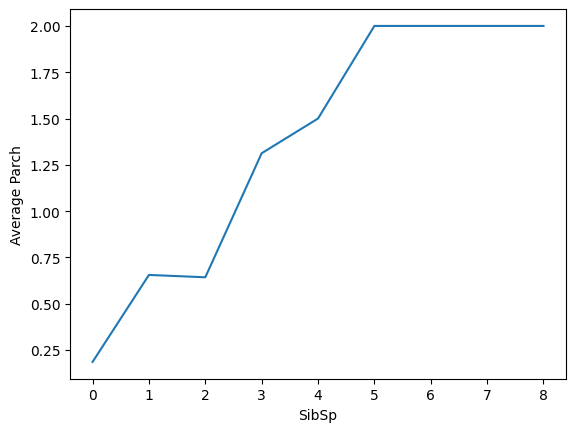

In [ ]:
data.groupby('SibSp')['Parch'].mean().plot()
plt.xlabel('SibSp')
plt.ylabel('Average Parch')
plt.show()

3

In [ ]:
#Чтобы улучшть точность нужно увеличить число ближаших соседей и число признаков
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def feature_selection_and_preprocessing(dataset):
    features = dataset[["Fare", "Pclass", "Sex", "Age"]].copy()
    features["Fare"] /= features["Fare"].mean()
    features['Sex'] = features['Sex'].map({'male': 0, 'female': 1})
    features['Age'] = features['Age'].fillna(features['Age'].median())
    return features

model = KNeighborsClassifier(n_neighbors=5, weights='uniform')

# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Test accuracy: 0.85


4

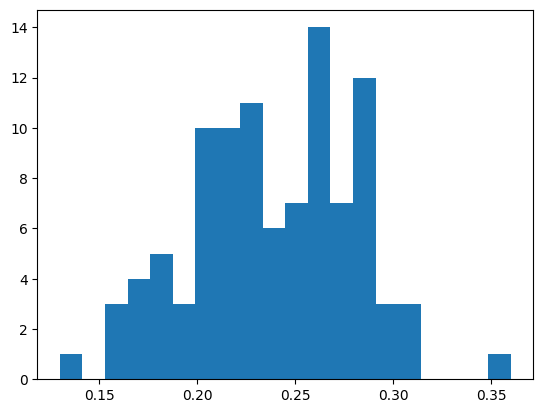

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

def feature_selection_and_preprocessing(dataset):
    features = dataset[["Fare", "Pclass", "Sex", "Age"]].copy()
    features["Fare"] /= features["Fare"].mean()
    features['Sex'] = features['Sex'].map({'male': 0, 'female': 1})
    features['Age'] = features['Age'].fillna(features['Age'].median())
    return features

model = KNeighborsClassifier(n_neighbors=5)

data = pd.read_csv("train.csv", index_col='PassengerId')

test_scores = []

for i in range(100):
    data_train, data_test = train_test_split(data, test_size=100, random_state=i)#не заметил эту функцию в тексте задания - долго не мог понять как сделать этот этап

    model.fit(
        feature_selection_and_preprocessing(data_train.drop('Survived', axis=1)),
        data_train['Survived']
    )

    test_predictions = model.predict(
        feature_selection_and_preprocessing(data_test.drop('Survived', axis=1))
    )

    accuracy = accuracy_score(data_test['Survived'], test_predictions)
    test_scores.append(accuracy)

test_errors = [1 - score for score in test_scores]

plt.hist(test_errors, bins=20)
plt.show()

#Homework_2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

1

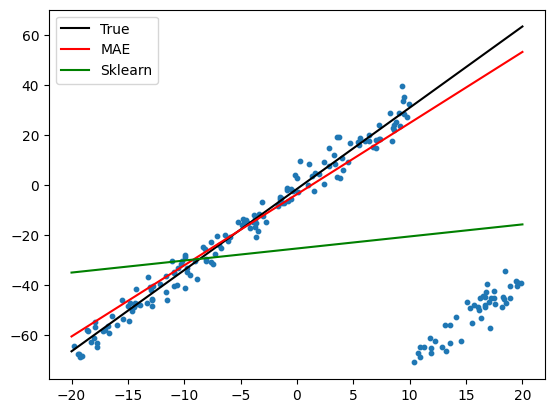

In [ ]:
from sklearn.linear_model import LinearRegression

np.random.seed(50)
x = np.random.uniform(-20, 20, 200)
y = 3.25 * x - 1.47 + np.random.normal(size=200) * 4
y[x > 10] += -100  # выбросы

w = np.random.randn(2)
for i in range(1000):
    y_pred = w[0] + w[1] * x
    w[0] -= 0.01 * -np.mean(np.sign(y - y_pred))
    w[1] -= 0.01 * -np.mean(np.sign(y - y_pred) * x)

lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)

plt.scatter(x, y, s=10)
x_plot = np.linspace(-20, 20, 200)
plt.plot(x_plot, 3.25*x_plot - 1.47, 'k', label='True')
plt.plot(x_plot, w[0] + w[1]*x_plot, 'r', label='MAE')
plt.plot(x_plot, lr.predict(x_plot.reshape(-1, 1)), 'g', label='Sklearn')
plt.legend()
plt.show()
# очевидно MAE менее чувствительна к выбросам и как следствие дает лучшее приближение

2

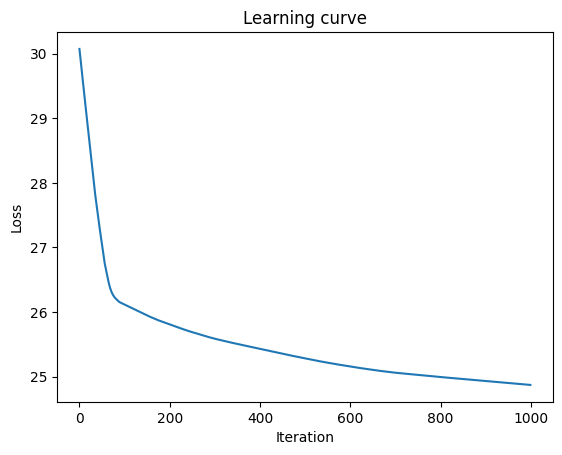

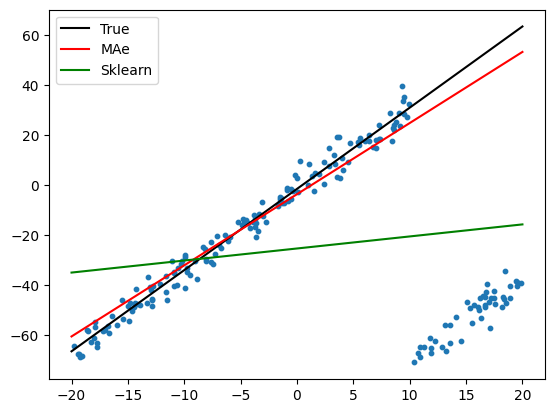

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, RegressorMixin

class LinearRegressionSGD(BaseEstimator, RegressorMixin):
    def __init__(self, loss='mae', lr=0.01, n_iter=1000):
        self.loss, self.lr, self.n_iter = loss, lr, n_iter
    def fit(self, x, y):
        x = x.ravel()
        self.w = np.random.randn(2)
        self.history = []
        for _ in range(self.n_iter):
            y_pred = self.w[0] + self.w[1]*x
            err = y - y_pred
            g = -np.sign(err) if self.loss=='mae' else -2*err
            self.w[0] -= self.lr*np.mean(g)
            self.w[1] -= self.lr*np.mean(g*x)
            self.history.append(np.mean(np.abs(err)) if self.loss=='mae' else np.mean(err**2))
        return self
    def predict(self, x): return self.w[0] + self.w[1]*x.ravel()
    def fit_predict(self, x, y): return self.fit(x, y).predict(x)

np.random.seed(50)
x = np.random.uniform(-20, 20, 200)
y = 3.25*x - 1.47 + np.random.normal(size=200)*4
y[x > 10] += -100

model = LinearRegressionSGD(loss='mae', lr=0.01, n_iter=1000).fit(x, y)
lr = LinearRegression().fit(x.reshape(-1,1), y)

plt.plot(model.history)
plt.title('Learning curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

x_plot = np.linspace(-20, 20, 200)
plt.scatter(x, y, s=10)
plt.plot(x_plot, 3.25*x_plot - 1.47, 'k', label='True')
plt.plot(x_plot, model.predict(x_plot), 'r', label='MAe')
plt.plot(x_plot, lr.predict(x_plot.reshape(-1,1)), 'g', label='Sklearn')
plt.legend(); plt.show()
#зависимость не изменилась

#Homework_3

In [ ]:
!wget https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv

--2025-10-13 11:46:41--  https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2025-10-13 11:46:41 (5.09 MB/s) - ‘train.csv.1’ saved [60302/60302]



In [ ]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def feature_selection_and_preprocessing(dataset):
    features = dataset[["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", "Embarked"]].copy()
    features["Fare"] = features["Fare"].fillna(features["Fare"].median())
    features["Age"] = features["Age"].fillna(features["Age"].median())
    features["Embarked"] = features["Embarked"].fillna("S")
    features["FamilySize"] = features["SibSp"] + features["Parch"] + 1
    features["FarePerPerson"] = features["Fare"] / features["FamilySize"]
    features["Age*Class"] = features["Age"] * features["Pclass"]
    features["IsAlone"] = (features["FamilySize"] == 1).astype(int)
    return features

model = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(), ["Sex", "Embarked"]),
        remainder=StandardScaler()
    ),
    LogisticRegression(C=0.1, max_iter=1000)
)

# Validation code
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train, data_test = train_test_split(data, test_size=200, random_state=42)

model.fit(
    feature_selection_and_preprocessing(data_train.drop('Survived', axis=1)),
    data_train['Survived']
)

train_predictions = model.predict(feature_selection_and_preprocessing(data_train.drop('Survived', axis=1)))
test_predictions = model.predict(feature_selection_and_preprocessing(data_test.drop('Survived', axis=1)))

print("Train accuracy:", accuracy_score(data_train['Survived'], train_predictions))
print("Test accuracy:", accuracy_score(data_test['Survived'], test_predictions))

Train accuracy: 0.7988422575976846
Test accuracy: 0.81


#Homework_4

1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge, Lasso

100%|██████████| 100/100 [00:00<00:00, 547.34it/s]


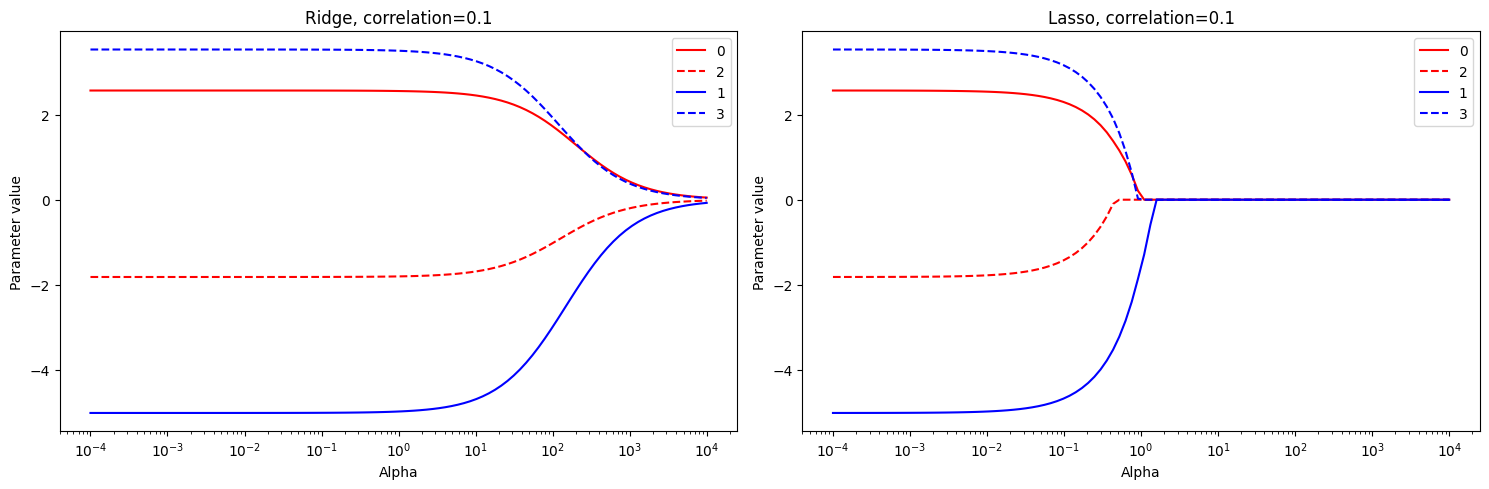

100%|██████████| 100/100 [00:00<00:00, 367.14it/s]


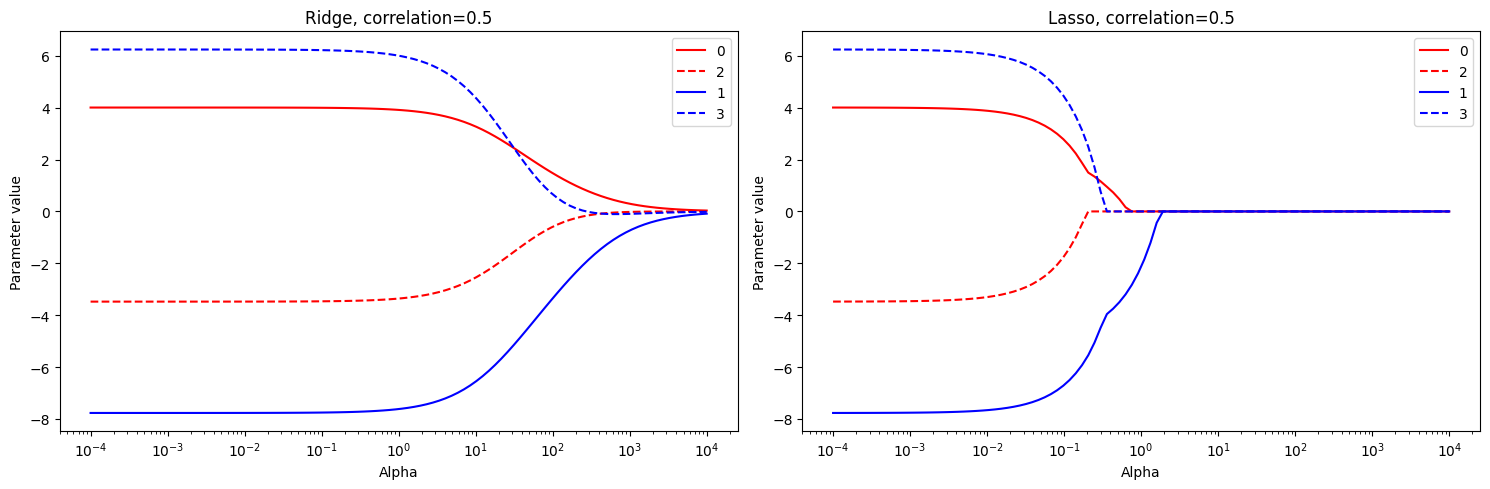

100%|██████████| 100/100 [00:00<00:00, 407.58it/s]


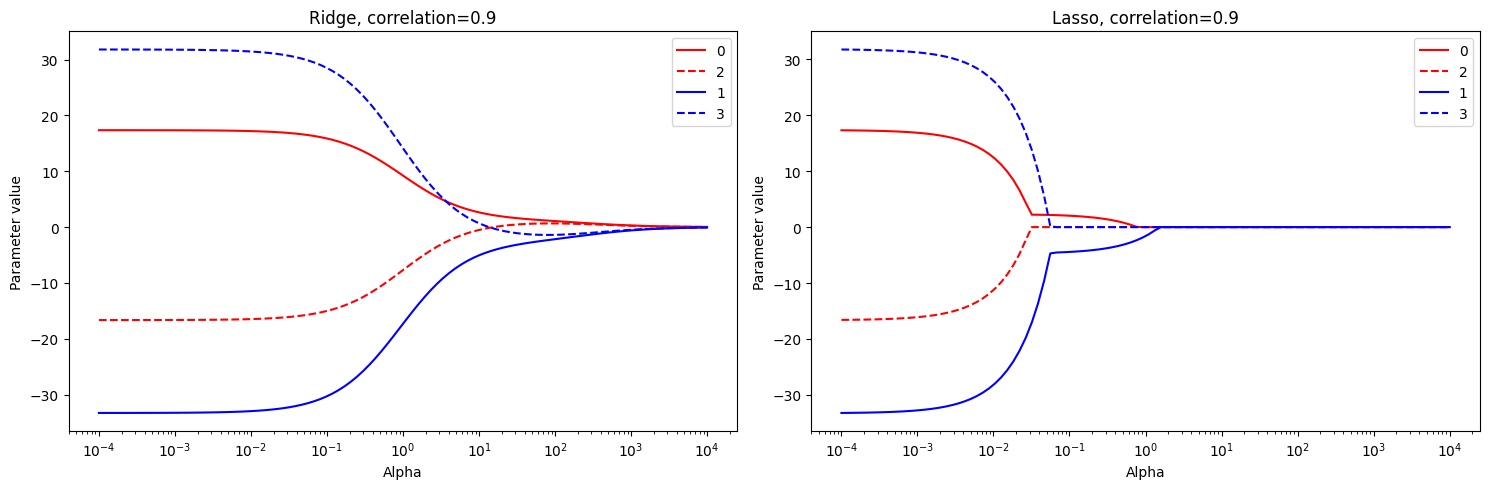

In [ ]:

from tqdm import tqdm
def gen_data(N, correlation=0.5):
    X = np.random.uniform(-1., 1., size=(N, 4))
    y = X @ [2.3, -4.7, -1.7, 3.2]
    X[:,2:] = correlation * X[:,:2] + (1 - correlation) * X[:,2:]
    y += np.random.normal(size=y.shape)
    return X, y

for correlation in [0.1, 0.5, 0.9]:
    X, y = gen_data(500, correlation)
    alpha_values = np.logspace(-4, 4, 100, base=10)

    params_ridge = []
    params_lasso = []

    for alpha in tqdm(alpha_values):
        ridge = Ridge(alpha=alpha, fit_intercept=False)
        ridge.fit(X, y)
        params_ridge.append(ridge.coef_)

        lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=10000)
        lasso.fit(X, y)
        params_lasso.append(lasso.coef_)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(alpha_values, [p[0] for p in params_ridge], 'r-', label='0')
    plt.plot(alpha_values, [p[2] for p in params_ridge], 'r--', label='2')
    plt.plot(alpha_values, [p[1] for p in params_ridge], 'b-', label='1')
    plt.plot(alpha_values, [p[3] for p in params_ridge], 'b--', label='3')
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('Parameter value')
    plt.title(f'Ridge, correlation={correlation}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(alpha_values, [p[0] for p in params_lasso], 'r-', label='0')
    plt.plot(alpha_values, [p[2] for p in params_lasso], 'r--', label='2')
    plt.plot(alpha_values, [p[1] for p in params_lasso], 'b-', label='1')
    plt.plot(alpha_values, [p[3] for p in params_lasso], 'b--', label='3')
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('Parameter value')
    plt.title(f'Lasso, correlation={correlation}')
    plt.legend()

    plt.tight_layout()
    plt.show()

При увеличении корреляции параметры сжимаются к одинаковым значениям быстрее, причем для Lasso это сжатие происходит значитльно быстрее. При этом Ridge сходится равномерно, тогда как Lasso неравномерно (рывком)